___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# K Nearest Neighbors Project - Solution

Welcome to the KNN Project! This will be a simple project very similar to the lecture, except you'll be given another data set. Go ahead and just follow the directions below.
## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [1]:
from platform import python_version
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
print("version:")
print("python: ", python_version())
print("numpy: ", np.__version__)
print("pandas: ", pd.__version__)
print("seaborn: ", sns.__version__)
print("matplotlib: ", sns.__version__)
print("sklearn: ", sklearn.__version__)

version:
python:  3.7.1
numpy:  1.15.4
pandas:  0.23.4
seaborn:  0.9.0
matplotlib:  0.9.0
sklearn:  0.20.2


## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [3]:
df = pd.read_csv('KNN_Project_Data')

**Check the head of the dataframe.**

In [4]:
df.head() 

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

/home/jun-chieh/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/jun-chieh/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/jun-chieh/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/jun-chieh/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, *

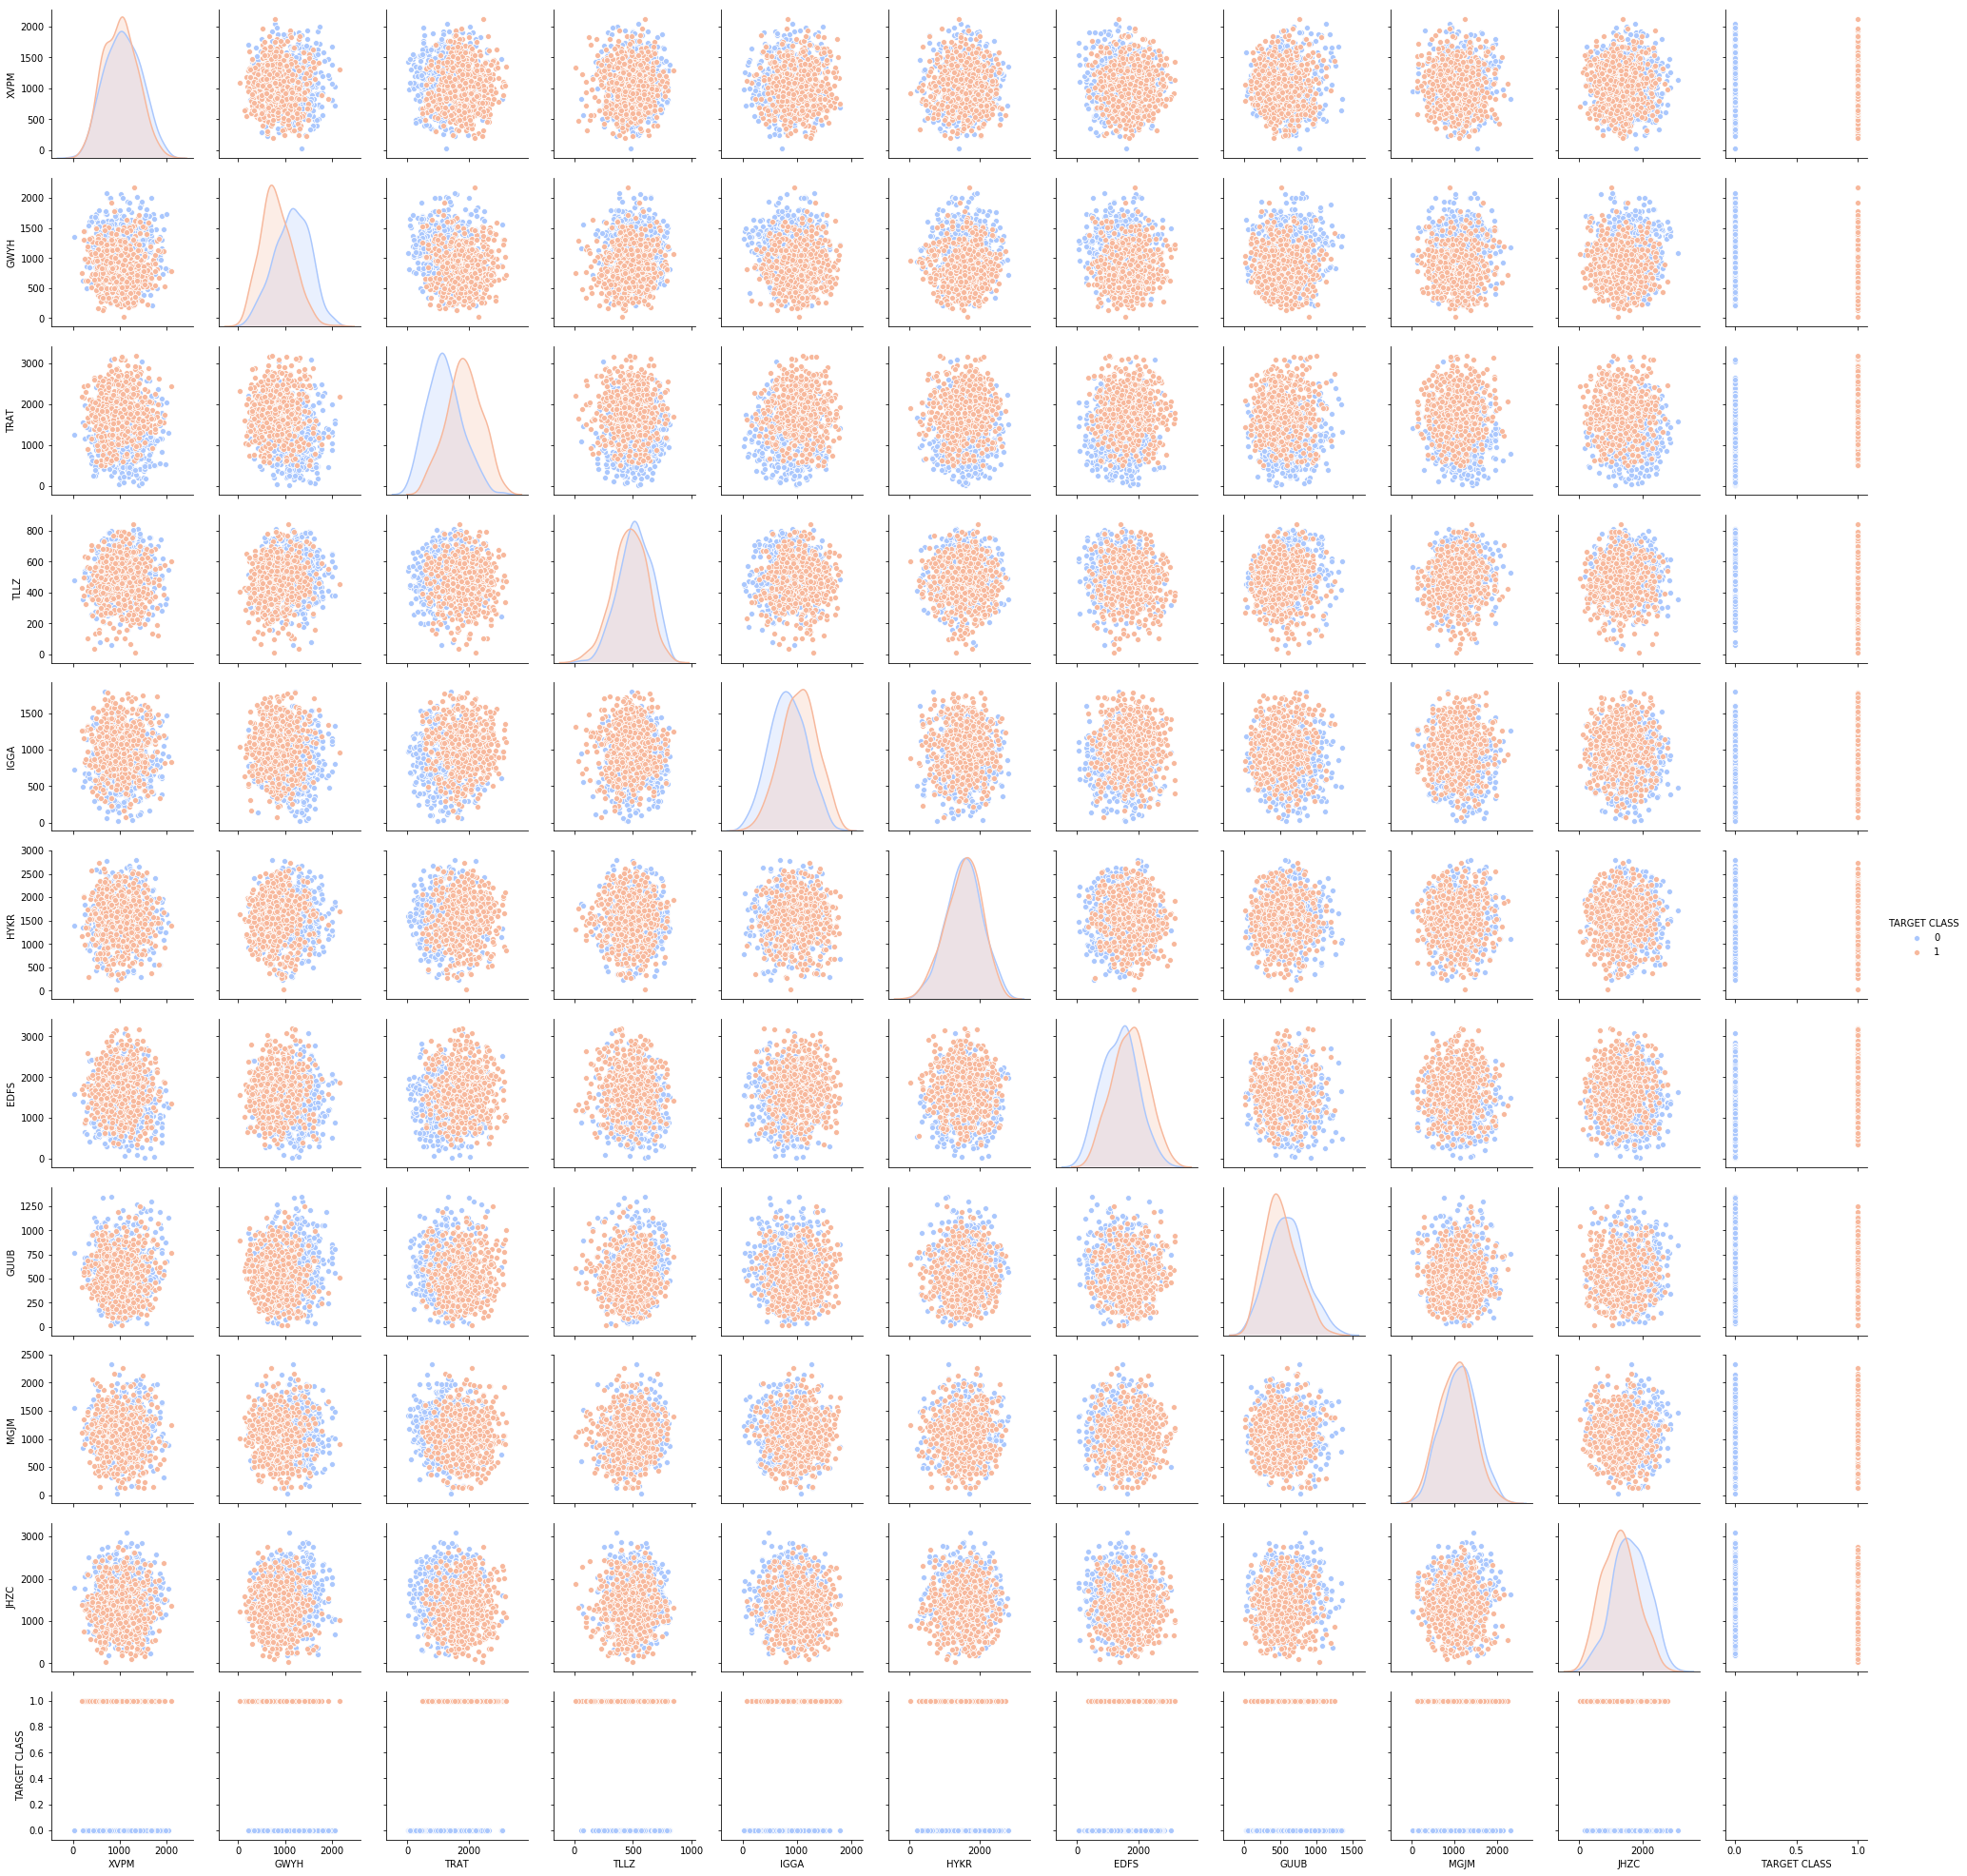

In [5]:
# THIS IS GOING TO BE A VERY LARGE PLOT
sns.pairplot(df,hue='TARGET CLASS',palette='coolwarm')

# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [6]:
#from sklearn.preprocessing import StandardScaler

** Create a StandardScaler() object called scaler.**

In [7]:
scaler = StandardScaler()

** Fit scaler to the features.**

In [8]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

**Use the .transform() method to transform the features to a scaled version.**

In [9]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [10]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [11]:
#from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [13]:
#from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [14]:
knn = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [15]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [16]:
pred = knn.predict(X_test)

** Create a confusion matrix and classification report.**

In [17]:
#from sklearn.metrics import classification_report,confusion_matrix

In [18]:
print(confusion_matrix(y_test,pred))

[[110  46]
 [ 37 107]]


In [19]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73       156
           1       0.70      0.74      0.72       144

   micro avg       0.72      0.72      0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [20]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

**Now create the following plot using the information from your for loop.**

Text(0, 0.5, 'Error Rate')

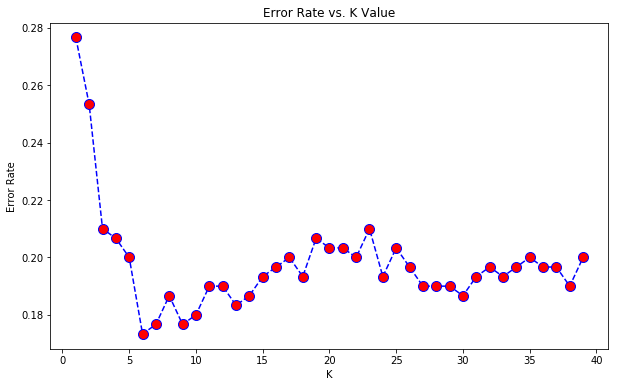

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [22]:
# NOW WITH K=30
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=30


[[125  31]
 [ 25 119]]


              precision    recall  f1-score   support

           0       0.83      0.80      0.82       156
           1       0.79      0.83      0.81       144

   micro avg       0.81      0.81      0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



# Great Job!

X.shape: (1000, 2)
Y.shape: (1000,)
X_train.shape: (670, 2)
X_test.shape: (330, 2)
Y_train.shape: (670,)
Y_test.shape: (330,)
predictions.shape: (330,)
X1_min, X1_max :  -2.7883388795569024 2.8639270402022627
X2_min, X2_max :  -2.340083429790135 2.5792414183261534
X1.shape : (1000, 500)
X2.shape : (1000, 500)
grid : [[-2.78833888 -2.34008343]
 [-2.78833888 -2.33024478]
 [-2.78833888 -2.32040613]
 ...
 [ 2.85827477  2.54972547]
 [ 2.85827477  2.55956412]
 [ 2.85827477  2.56940277]]
grid.shape : (500000, 2)
surface.shape (1000, 500)


Text(0.5, 1.0, 'X, Y')

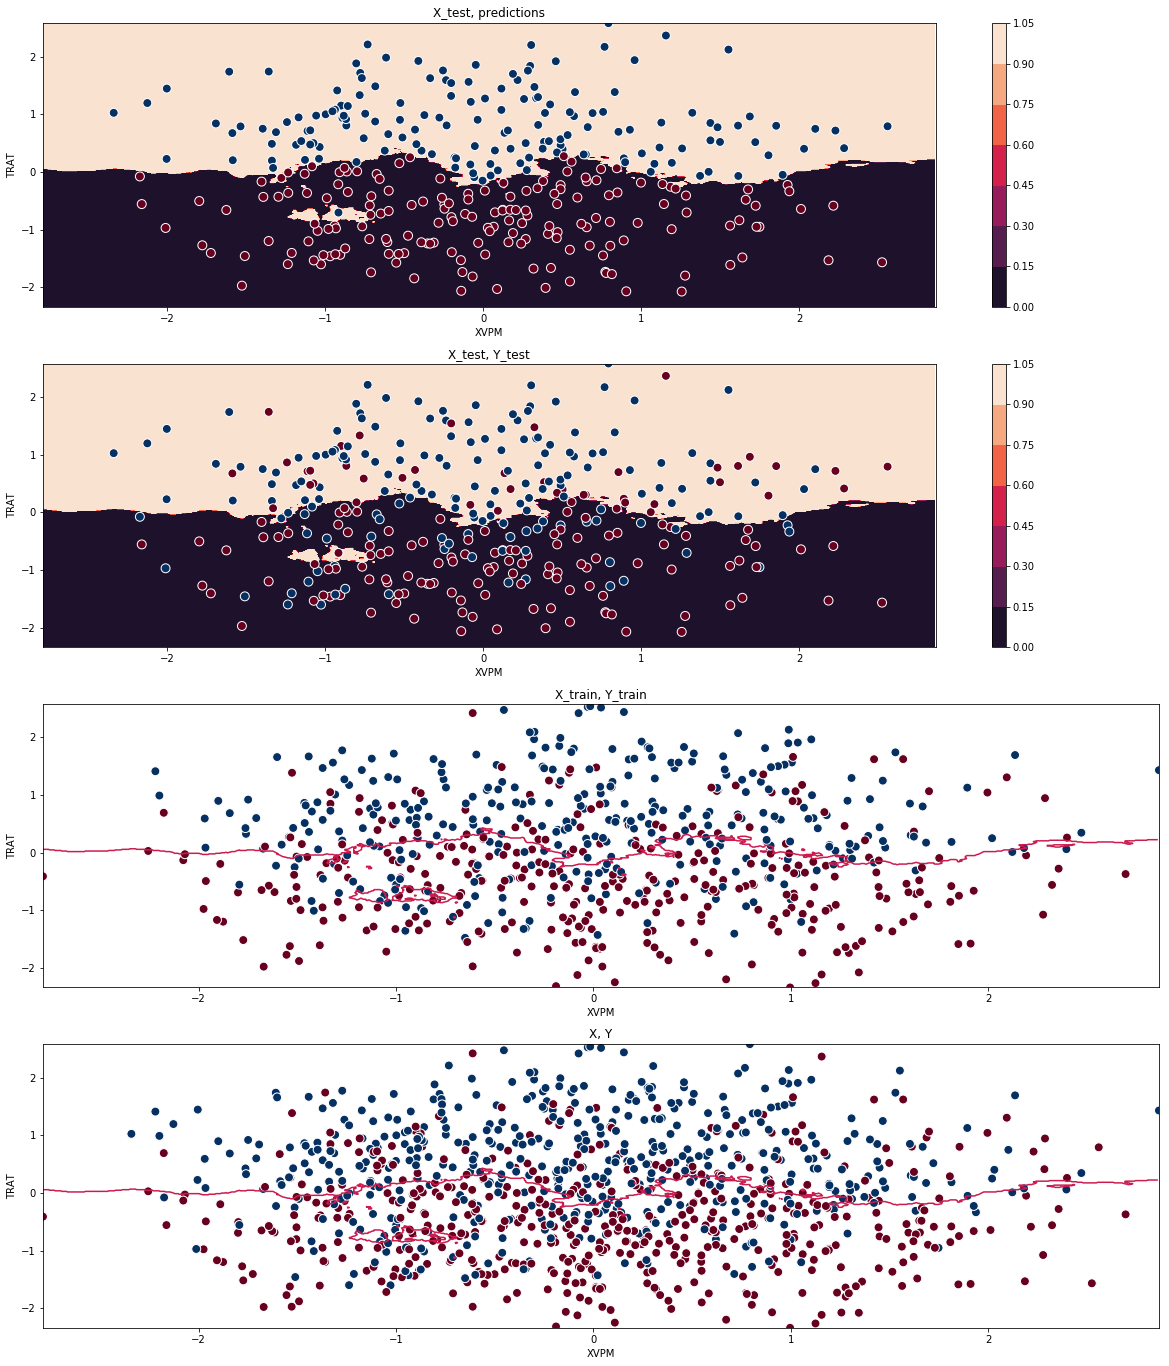

In [23]:
# ref:
# https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/learn/v4/t/lecture/5733442?start=665
# visualize the trained model.
#
X = df_feat[['XVPM','TRAT']]
Y = df['TARGET CLASS']
print('X.shape:',X.shape)
print('Y.shape:',Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print('X_train.shape:',X_train.shape)
print('X_test.shape:',X_test.shape)
print('Y_train.shape:',Y_train.shape)
print('Y_test.shape:',Y_test.shape)

knn=KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,Y_train)
predictions=knn.predict(X_test)
print('predictions.shape:',predictions.shape)

# plot
X1_min = X['XVPM'].min()
X1_max = X['XVPM'].max()
X2_min = X['TRAT'].min()
X2_max = X['TRAT'].max()
print('X1_min, X1_max : ',X1_min,X1_max)
print('X2_min, X2_max : ',X2_min,X2_max)

X1,  X2 = np.mgrid[X1_min:X1_max:(X1_max-X1_min)/1000, X2_min:X2_max:(X2_max-X2_min)/500]
print('X1.shape :',X1.shape)
print('X2.shape :',X2.shape)

grid = np.c_[X1.ravel(), X2.ravel()]
print('grid :', grid)
print('grid.shape :', grid.shape)

surface = knn.predict(grid).reshape(X1.shape)
print('surface.shape',surface.shape)

f, ax = plt.subplots(nrows=4,ncols=1,figsize=(20,24))

# individual colorbar in subplot :
# https://stackoverflow.com/questions/13784201/matplotlib-2-subplots-1-colorbar
# https://matplotlib.org/examples/images_contours_and_fields/pcolormesh_levels.html
    
# contour map
for ii in np.arange(0,2):
    contour = ax[ii].contourf(X1,X2,surface, cmap='rocket',vmin=0,vmax=1)
    f.colorbar(contour,ax=ax[ii])
    ax[ii].set(xlim=(X1_min,X1_max),ylim=(X2_min,X2_max),xlabel="XVPM", 
        ylabel="TRAT")

# decision boundary
for ii in np.arange(2,4):
    #contour = ax[ii].contourf(X1,X2,surface, cmap='rocket',vmin=0,vmax=1)
    contour = ax[ii].contour(X1,X2,surface, levels=[0.5], cmap='rocket',vmin=0,vmax=1)
    #f.colorbar(contour,ax=ax[ii])
    ax[ii].set(xlim=(X1_min,X1_max),ylim=(X2_min,X2_max),xlabel="XVPM", 
        ylabel="TRAT")    
    
ax[0].scatter(X_test['XVPM'],X_test['TRAT'],c=predictions,cmap='RdBu',
           vmin=0,vmax=1,s=80,edgecolor='white',linewidth=1)
ax[0].set_title('X_test, predictions')

ax[1].scatter(X_test['XVPM'],X_test['TRAT'],c=Y_test,cmap='RdBu',
           vmin=0,vmax=1,s=80,edgecolor='white',linewidth=1)
ax[1].set_title('X_test, Y_test')

ax[2].scatter(X_train['XVPM'],X_train['TRAT'],c=Y_train,cmap='RdBu',
           vmin=0,vmax=1,s=80,edgecolor='white',linewidth=1)
ax[2].set_title('X_train, Y_train')

ax[3].scatter(X['XVPM'],X['TRAT'],c=Y,cmap='RdBu',
           vmin=0,vmax=1,s=80,edgecolor='white',linewidth=1)
ax[3].set_title('X, Y')

n_row, n_col, n_total: 3 3 9
ax.shape: (3, 3)
k, row, column, =  1 0 0
k, row, column, =  2 0 1
k, row, column, =  3 0 2
k, row, column, =  4 1 0
k, row, column, =  5 1 1
k, row, column, =  6 1 2
k, row, column, =  7 2 0
k, row, column, =  8 2 1
k, row, column, =  9 2 2


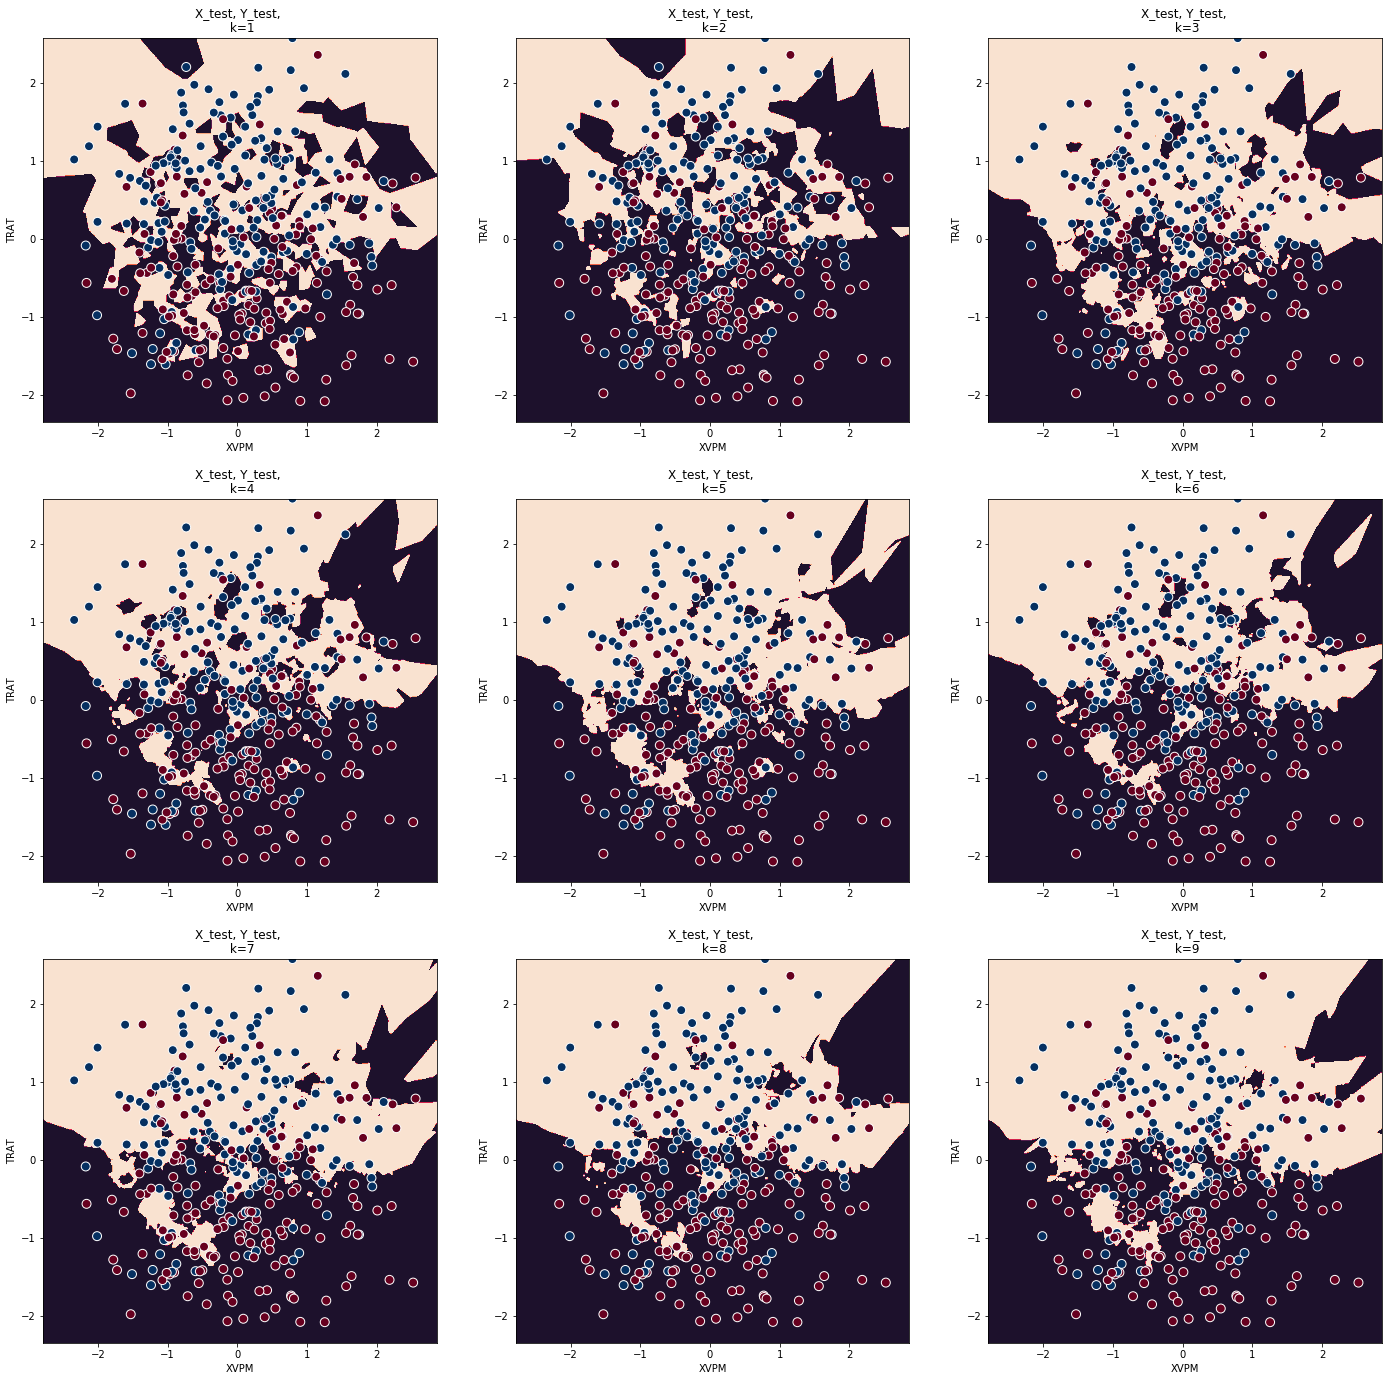

In [24]:
#
X = df_feat[['XVPM','TRAT']]
Y = df['TARGET CLASS']
#print('X.shape:',X.shape)
#print('Y.shape:',Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
#print('X_train.shape:',X_train.shape)
#print('X_test.shape:',X_test.shape)
#print('Y_train.shape:',Y_train.shape)
#print('Y_test.shape:',Y_test.shape)


n_row = 3
n_col = 3
n_total = n_row * n_col
print('n_row, n_col, n_total:',n_row,n_col,n_total)

f, ax = plt.subplots(nrows=n_row,ncols=n_col,figsize=(8*n_col,8*n_row))
print('ax.shape:',ax.shape)

# plot
X1_min = X['XVPM'].min()
X1_max = X['XVPM'].max()
X2_min = X['TRAT'].min()
X2_max = X['TRAT'].max()
#print('X1_min, X1_max : ',X1_min,X1_max)
#print('X2_min, X2_max : ',X2_min,X2_max)

X1,  X2 = np.mgrid[X1_min:X1_max:(X1_max-X1_min)/1000, X2_min:X2_max:(X2_max-X2_min)/500]
#print('X1.shape :',X1.shape)
#print('X2.shape :',X2.shape)

grid = np.c_[X1.ravel(), X2.ravel()]
#print('grid :', grid)
#print('grid.shape :', grid.shape)
    
for k in np.arange(1,n_total+1):
    
    # create index i, j for subplot
    i = int(k/n_col)
    j = np.mod(k,n_col)
    if (j==0):
        i=i-1
        j=n_col
    j = j-1    
    print('k, row, column, = ', k, i, j)
    
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    predictions=knn.predict(X_test)
    #print('predictions.shape:',predictions.shape)

    surface = knn.predict(grid).reshape(X1.shape)
    #print('surface.shape',surface.shape)

    # contour map
    contour = ax[i,j].contourf(X1,X2,surface, cmap='rocket',vmin=0,vmax=1)
    #f.colorbar(contour,ax=ax[i,j])
    ax[i,j].set(xlim=(X1_min,X1_max),ylim=(X2_min,X2_max),xlabel="XVPM",ylabel="TRAT")
    ax[i,j].scatter(X_test['XVPM'],X_test['TRAT'],c=Y_test,cmap='RdBu',vmin=0,vmax=1,s=80,edgecolor='white',linewidth=1)
    ax[i,j].set_title('X_test, Y_test, \n k=%i' %k)

#
# ref:
# 
# visualize the trained model:
# https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/learn/v4/t/lecture/5733442?start=665
#    
# individual colorbar in subplot:
# https://stackoverflow.com/questions/13784201/matplotlib-2-subplots-1-colorbar
# https://matplotlib.org/examples/images_contours_and_fields/pcolormesh_levels.html
#
# variable in matplotlib title:    
# https://stackoverflow.com/questions/43757820/how-to-add-a-variable-to-python-plt-title
#
#